## Домашнее задание №1 по курсу "Доп. главы математичекого моделирования"
### Выполнил студент группы НПМмд-02-18 Мигдалов Петр

## Задание 1

Имеется функция $u(x) = e^x, x \in (0, 1)$. Вычислить тремя способами $\frac{du}{dx}$. 
Для каждого способа найти погрешность вычисления $\Delta N = \max_{n}|q(x_n)|, N=2, 4, 8, 16, 32,...$ и построить графики.

#### Способ 1:
$\large \frac{du}{dx} = \frac{u(x_{n+1}) - u(x_n)}{x_{n+1} - x_n}$

#### Способ 2:
$\large \frac{du}{dx} = \frac{u(x_{n}) - u(x_{n-1})}{x_{n} - x_{n-1}}$

#### Способ 3:
$\large \frac{du}{dx} = \frac{u(x_{n+1}) - u(x_{n-1})}{x_{n+1} - x_{n-1}}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

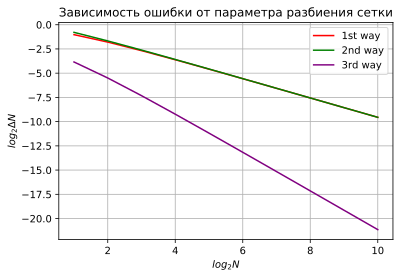

In [19]:
def diff_1(function=np.exp, x=[0, 1], N=2):
    '''
    function - дифференцируемая функция, по дефолту экспонента
    x - отрезок, по дефолту [0, 1)
    N - параметр сетки, по дефолту 2
    '''
    xx = np.linspace(*x, N+1) # получаем N+1 точку из отрезка x
    diff_x = function(xx)[:N] # точное решение для экспоненты
    diff_xx = np.array([(function(xx[n+1]) - function(xx[n])) / (xx[n+1] - xx[n]) for n in range(N)]) # приближенное
    return diff_x, diff_xx


def diff_2(function=np.exp, x=[0, 1], N=2):
    '''
    function - дифференцируемая функция, по дефолту экспонента
    x - отрезок, по дефолту (0, 1]
    N - параметр сетки, по дефолту 2
    '''
    xx = np.linspace(*x, N+1) # получаем N+1 точку из отрезка x
    diff_x = function(xx)[1:] # точное решение для экспоенты
    diff_xx = np.array([(function(xx[n]) - function(xx[n-1])) / (xx[n] - xx[n-1]) for n in range(1, N+1)])
    return diff_x, diff_xx


def diff_3(function=np.exp, x=[0, 1], N=2):
    '''
    function - дифференцируемая функция, по дефолту экспонента
    x - отрезок, по дефолту (0, 1)
    N - параметр сетки, по дефолту 2
    '''
    xx = np.linspace(*x, N+1) # получаем N+1 точку из отрезка x
    diff_x = function(xx)[1: N] # точное решение для экспоненты
    diff_xx = np.array([(function(xx[n+1]) - function(xx[n-1])) / (xx[n+1] - xx[n-1]) for n in range(1, N)])
    return diff_x, diff_xx


delta_N_1, delta_N_2, delta_N_3 = [], [], []
N_list = [2**x for x in range(1, 11)]

for n in N_list:
    diff_acc1, diff_app1 = diff_1(N=n)
    diff_acc2, diff_app2 = diff_2(N=n)
    diff_acc3, diff_app3 = diff_3(N=n)
    
    error1 = np.max(np.abs(diff_acc1 - diff_app1))
    error2 = np.max(np.abs(diff_acc2 - diff_app2))
    error3 = np.max(np.abs(diff_acc3 - diff_app3))
    
    delta_N_1.append(error1)
    delta_N_2.append(error2)
    delta_N_3.append(error3)
    

plt.plot(np.log2(N_list), np.log2(delta_N_1), color='red', label='1st way')
plt.plot(np.log2(N_list), np.log2(delta_N_2), color='green', label='2nd way')
plt.plot(np.log2(N_list), np.log2(delta_N_3), color='purple', label='3rd way')
plt.title('Зависимость ошибки от параметра разбиения сетки')
plt.xlabel('$log_2N$')
plt.ylabel('$log_2\Delta N$')
plt.grid(True)
plt.legend()
plt.show()

## Задание 2

Для аналогичной функции $u(x) = e^x$ вычислить двумя способами $\int_{0}^{1} u(x)dx$.
Найти погрешность вычисдения $\Delta N = |I_{точное} - I_{приближенное}|, N=2, 4, 8, 16, 32,...$ и построить графики.

#### Способ 1 (формула трапеций):
$I_{тр} = \sum_{n=0}^{N-1} \frac{h}{2} (u(x_n) + u(x_{n+1}))$

#### Способ 2 (формула средних):
$I_{ср} = \sum_{n=0}^{N-1} hu(x_n + \frac{h}{2})$

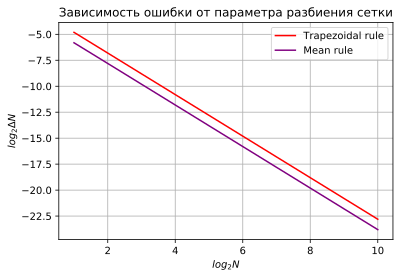

In [22]:
def integral_tr(function=np.exp, x=[0, 1], N=2):
    '''
    function - интегрируемая функция, по дефолту экспонента
    x - отрезок, по дефолту [0, 1)
    N - параметр сетки, по дефолту 2
    '''
    xx = np.linspace(*x, N+1) # получаем N+1 точку из отрезка x
    h = 1 / N # шаг сетки
    integral_x = function(1) - 1 # точное решение для экспоненты
    integral_xx = sum([h/2 * (function(xx[n]) + function(xx[n+1])) for n in range(N)]) #метод трапеций
    return integral_x, integral_xx


def integral_means(function=np.exp, x=[0, 1], N=2):
    '''
    function - интегрируемая функция, по дефолту экспонента
    x - отрезок, по дефолту [0, 1)
    N - параметр сетки, по дефолту 2
    '''
    xx = np.linspace(*x, N+1) # получаем N+1 точку из отрезка x
    h = 1 / N
    integral_x = function(1) - 1 # точное решение для экспоненты
    integral_xx = sum([h * function(xx[n] + h/2) for n in range(N)])
    return integral_x, integral_xx


    
delta_int_N_1, delta_int_N_2 = [], []
N_list = [2**x for x in range(1, 11)]

for n in N_list:
    integral_acc1, integral_app1 = integral_tr(N=n)
    integral_acc2, integral_app2 = integral_means(N=n)
    
    error1 = abs(integral_acc1 - integral_app1)
    error2 = abs(integral_acc2 - integral_app2)
    
    delta_int_N_1.append(error1)
    delta_int_N_2.append(error2)
    

plt.plot(np.log2(N_list), np.log2(delta_int_N_1), color='red', label='Trapezoidal rule')
plt.plot(np.log2(N_list), np.log2(delta_int_N_2), color='purple', label='Mean rule')
plt.title('Зависимость ошибки от параметра разбиения сетки')
plt.xlabel('$log_2N$')
plt.ylabel('$log_2\Delta N$')
plt.grid(True)
plt.legend()
plt.show()